## Objective
* The objective of this exercise is to explore and visualize the Traffic Index dataset to gain insights and understand the patterns in the data.

##Dataset Description

| Column Name | Description | Data Type |
| :---------------- | :------: | ----: |
|   City  |   Name of the city	   | Object |
| Datetime           |   Date and time of the data entry	   | Object |
|  TrafficIndexLive    |  Real-time traffic index	   | Int |
|  Jamscount |  Number of traffic jams	   | Int |
|   JamsDelay  |   Total delay caused by traffic jams (in minutes)	   | Float |
|JamsLength           |   Total length of traffic jams (in kilometers)	   | Float |
|  TrafficIndexWeekAgo    |  Traffic index one week ago	   | Int |
|  TravelTimeHistoric |  Historical average travel time (in minutes)	   | Float |
|   TravelTimeLive  |   Real-time travel time (in minutes)	   | Float |


# Tasks

## 1. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/exam week 1 SDAIA Zeham/Task 2/Task (2) Dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66639 entries, 0 to 66638
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 66639 non-null  object 
 1   Datetime             66639 non-null  object 
 2   TrafficIndexLive     66639 non-null  int64  
 3   JamsCount            66639 non-null  int64  
 4   JamsDelay            66639 non-null  float64
 5   JamsLength           66639 non-null  float64
 6   TrafficIndexWeekAgo  66639 non-null  int64  
 7   TravelTimeHistoric   62772 non-null  float64
 8   TravelTimeLive       62772 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 4.6+ MB


In [ ]:
df.head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246


In [ ]:
df.describe()

,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
count,66639.000000,66639.000000,66639.000000,66639.000000,66639.000000,62772.000000,62772.000000
mean,14.043113,74.278531,288.353877,49.316135,13.981737,70.706601,70.048451
std,13.488906,107.452022,470.013224,85.352525,13.454922,10.588384,11.966725
min,0.000000,0.000000,0.000000,0.000000,0.000000,49.381346,46.723235
25%,3.000000,9.000000,27.700000,3.000000,3.000000,63.142591,60.712805
50%,10.000000,29.000000,95.700000,12.200000,10.000000,68.894790,68.247303
75%,21.000000,95.000000,336.600000,53.500000,21.000000,76.250975,77.043739
max,138.000000,1359.000000,9989.400000,1173.900000,138.000000,120.140593,134.484139


In [ ]:
df['City'].value_counts()

City
Doha        8692
Riyadh      8692
Kuwait      8691
Cairo       8690
Dubai       8690
Abudhabi    3864
Al-ain      3864
Dammam      3864
Jeddah      3864
Mecca       3864
Medina      3864
Name: count, dtype: int64

### Identify and analyze patterns in the data.

In [ ]:
df.groupby('City')['City'].count()

City
Abudhabi    3864
Al-ain      3864
Cairo       8690
Dammam      3864
Doha        8692
Dubai       8690
Jeddah      3864
Kuwait      8691
Mecca       3864
Medina      3864
Riyadh      8692
Name: City, dtype: int64

In [ ]:
df.groupby(['City','JamsCount'])['JamsCount'].mean()

City      JamsCount
Abudhabi  0              0.0
          1              1.0
          2              2.0
          3              3.0
          4              4.0
                       ...  
Riyadh    757          757.0
          767          767.0
          778          778.0
          797          797.0
          883          883.0
Name: JamsCount, Length: 2999, dtype: float64

In [ ]:
df.head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246


In [ ]:
df.groupby(['City']).agg(
    avg_jam_delay =('JamsDelay','mean'),
    max_travel_time = ('TravelTimeLive','max'),
    avg_jams =('JamsCount','mean') ,
)

,avg_jam_delay,max_travel_time,avg_jams
City,,,
Abudhabi,107.800285,93.518245,29.870859
Al-ain,22.606573,77.182283,6.837733
Cairo,269.112911,134.484139,65.302186
Dammam,123.072516,104.831761,33.675983
Doha,127.612057,123.462136,41.909457
Dubai,717.264856,133.372646,185.216341
Jeddah,182.129322,119.130627,48.843944
Kuwait,247.578610,106.671663,68.176619
Mecca,42.870885,97.601586,11.925207


### Visualize the distribution of key variables (e.g., Traffic_Index, Date).

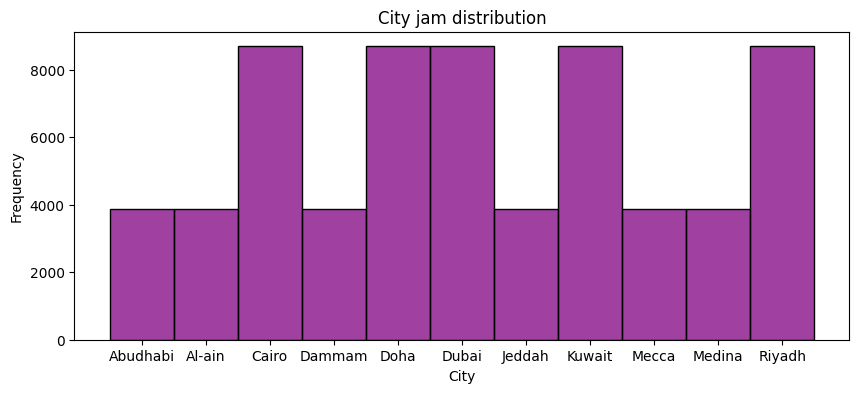

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(data = df['City']  , bins = 20 , color = 'purple' )
plt.title("City jam distribution")
plt.xlabel('City')
plt.ylabel('Frequency')
plt.show()

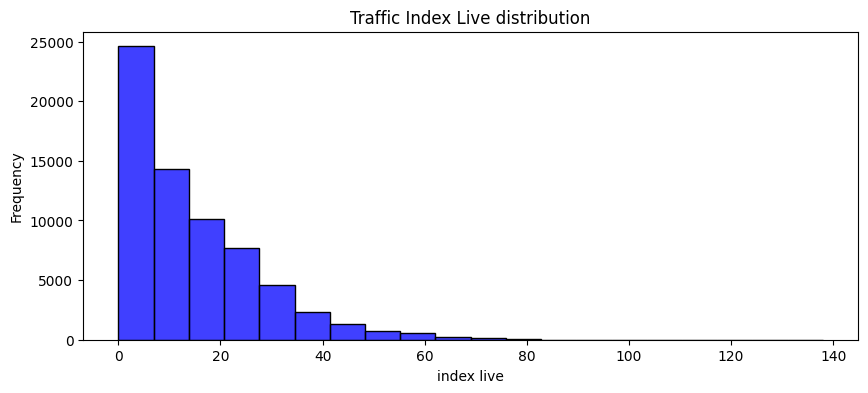

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(data = df['TrafficIndexLive']  , bins = 20 , color = 'blue' )
plt.title("Traffic Index Live distribution")
plt.xlabel('index live')
plt.ylabel('Frequency')
plt.show()

### Explore relationships between variables (e.g., Traffic_Index vs. Weather_Condition).


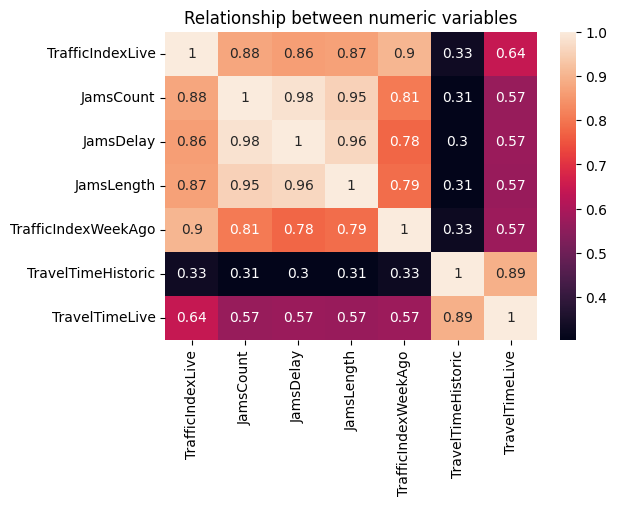

In [ ]:
plt.figure(figsize=(6,4))
matrix=df.select_dtypes(exclude=['object'])
sns.heatmap(matrix.corr() , robust= True , annot =True , cmap='rocket')
plt.title('Relationship between numeric variables')
plt.show()

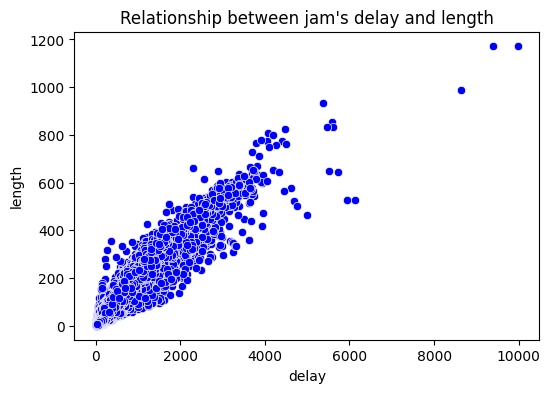

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(df , x = 'JamsDelay' , y = 'JamsLength' , color = 'blue')
plt.title("Relationship between jam's delay and length")
plt.xlabel("delay")
plt.ylabel("length")
plt.show()

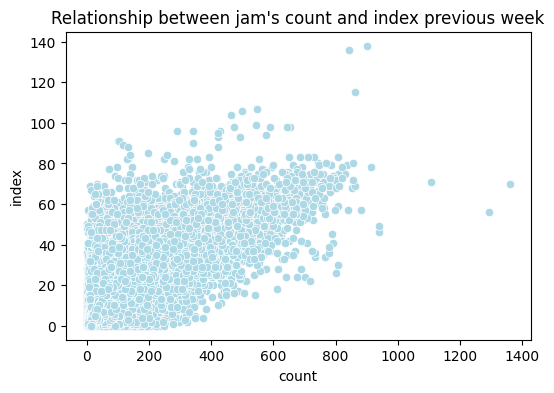

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(df , x = 'JamsCount' , y = 'TrafficIndexWeekAgo' , color = 'lightblue')
plt.title("Relationship between jam's count and index previous week")
plt.xlabel("count")
plt.ylabel("index")
plt.show()

## 2. Data Visualization

([<matplotlib.patches.Wedge at 0x7e2d11696890>,
 [Text(1.0817997048373986, 0.1992721722010315, 'Abudhabi'),
  Text(0.9397910578966044, 0.571657911252509, 'Al-ain'),
  Text(0.4610266516004685, 0.9987264022313921, 'Cairo'),
  Text(-0.1745641059189055, 1.0860604830877207, 'Dammam'),
  Text(-0.7508495972728773, 0.8038811369071663, 'Doha'),
  Text(-1.099999998772886, 5.1958168818443084e-05, 'Dubai'),
  Text(-0.9129367800428269, -0.6136337960420982, 'Jeddah'),
  Text(-0.41527398762602846, -1.018600763401038, 'Kuwait'),
  Text(0.2236734236868494, -1.0770191268200409, 'Mecca'),
  Text(0.5927541701019519, -0.9266296422124356, 'Medina'),
  Text(1.0089332540602283, -0.4382393054615701, 'Riyadh')],
 [Text(0.5900725662749446, 0.10869391210965353, '6%'),
  Text(0.5126133043072387, 0.3118134061377322, '6%'),
  Text(0.25146908269116464, 0.5447598557625775, '13%'),
  Text(-0.09521678504667573, 0.5923966271387567, '6%'),
  Text(-0.40955432578520573, 0.4384806201311816, '13%'),
  Text(-0.599999999330665,

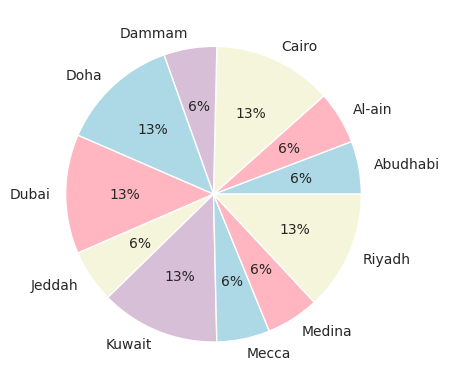

In [ ]:

labels = list(df['City'].unique())
sizes = list(df.groupby('City')['City'].count())



sns.set_style("whitegrid")
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,
       colors=['lightblue', 'lightpink', 'beige', 'thistle'],
       autopct='%1.f%%',
       )

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


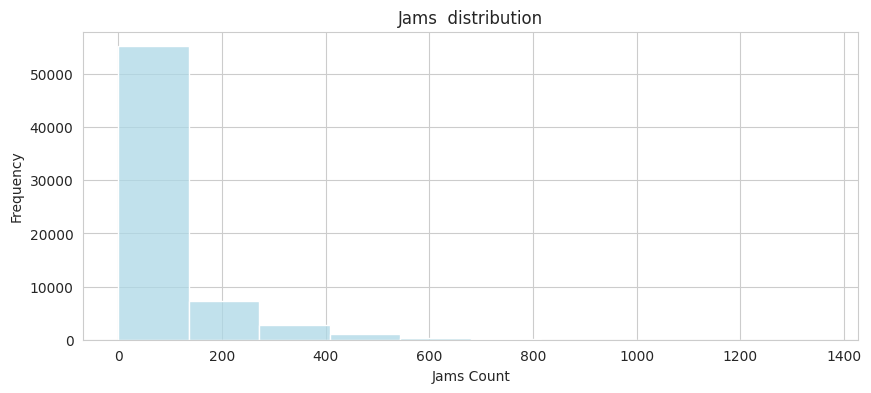

In [63]:
plt.figure(figsize=(10,4))
sns.histplot(data = df['JamsCount']  , bins = 10 , color = 'lightblue' )
plt.title("Jams  distribution")
plt.xlabel('Jams Count')
plt.ylabel('Frequency')
plt.show()

<ipython-input-65-5bb70d589efc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y='JamsCount',x='City', palette='viridis')


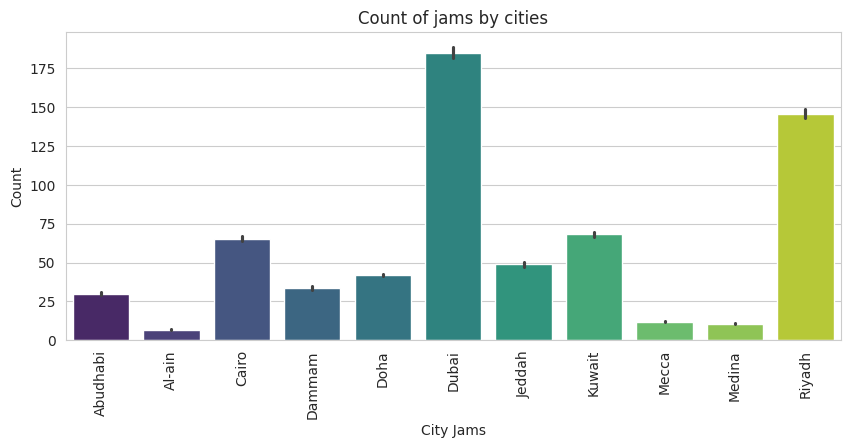

In [65]:
plt.figure(figsize=(10, 4))
sns.barplot(data=df, y='JamsCount',x='City', palette='viridis')
plt.title('Count of jams by cities')
plt.xlabel('City Jams')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

In [82]:
from datetime import datetime
df['Datetime']=pd.to_datetime(df['Datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66639 entries, 0 to 66638
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   City                 66639 non-null  object        
 1   Datetime             66639 non-null  datetime64[ns]
 2   TrafficIndexLive     66639 non-null  int64         
 3   JamsCount            66639 non-null  int64         
 4   JamsDelay            66639 non-null  float64       
 5   JamsLength           66639 non-null  float64       
 6   TrafficIndexWeekAgo  66639 non-null  int64         
 7   TravelTimeHistoric   62772 non-null  float64       
 8   TravelTimeLive       62772 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 4.6+ MB


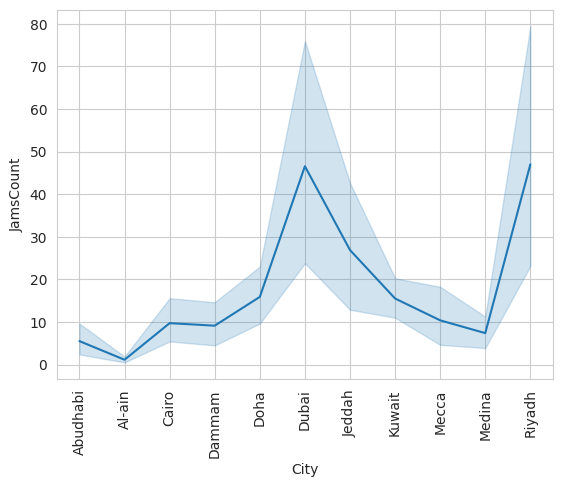

In [89]:
after = df.query("Datetime >= '2023-12-15 00:00:00'")
sns.lineplot(after,
             x='City',
             y='JamsCount'
             )
plt.xticks(rotation=90)
plt.show()

## 3. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>

***highest city count was 8692 for both Riyadh and Doha.***
***average jam delay for Riyadh was approx 620 and for Doha was 127.***
***average jams for Riyadh was approx 146 and for Doha was 42.***
***Traffic Index Live distribution is a left-skewed.***
***highst relationship between variables was between jams delay and jams count.***
***Riyadh and Dubai and Doha have a percantage of jams reaching to 13% each.***
***JamsCount  has a left-skewed distribution also.***
***Dubai has the highest count of jams by above 175, Riyadh following it by approx 148.***
***within the recent jams (after 2023-12-15) dubai has the largest jam count by approx 46.***
